In [191]:
import numpy as np
import pandas as pd

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [193]:

McD=pd.read_csv(r"C:\Users\a980mzz\Downloads\MCDonalds.csv")

In [194]:
McD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [195]:
# converting the data to numeric
# data cleaning

from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()

In [201]:
McD.Gender    =  le.fit_transform(McD.Gender)
McD.yummy    =  le.fit_transform(McD.yummy)
McD.convenient    =  le.fit_transform(McD.convenient)
McD.spicy    =  le.fit_transform(McD.spicy)
McD.fattening    =  le.fit_transform(McD.fattening)
McD.greasy    =  le.fit_transform(McD.greasy)
McD.fast    =  le.fit_transform(McD.fast)
McD.cheap    =  le.fit_transform(McD.cheap)
McD.tasty    =  le.fit_transform(McD.tasty)
McD.expensive    =  le.fit_transform(McD.expensive)
McD.healthy    =  le.fit_transform(McD.healthy)
McD.disgusting    =  le.fit_transform(McD.disgusting)


In [202]:
McD.Like=McD.Like.replace({'I love it!+5':5,'I hate it!-5':-5})

In [203]:
McD.Like.unique()

array(['-3', '2', '1', '4', 5, -5, '-2', '3', '0', '-4', '-1'],
      dtype=object)

In [204]:
McD.VisitFrequency =McD.VisitFrequency.replace({'More than once a week':5,'Once a week':4,'Once a month':3,'Every three months':2,'Once a year':1,'Never':0})

In [205]:
McD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [206]:
from sklearn.cluster import KMeans

In [213]:
centroids = pd.DataFrame(McD_kmeans.cluster_centers_)

In [214]:
centroids.columns =  McD.columns

In [215]:
# centre value for each records comes under same cluster
# bistance between centre and records.
centroids

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.657051,0.910256,0.044872,0.894231,0.564103,0.871795,0.567308,0.692308,0.403846,0.224359,0.262821,1.044872,35.285256,2.560897,0.458333
1,0.417957,0.910217,0.105263,0.829721,0.442724,0.913313,0.628483,0.563467,0.321981,0.179567,0.275542,0.126935,54.965944,2.003096,0.417957
2,0.486792,0.916981,0.098113,0.864151,0.471698,0.864151,0.509434,0.607547,0.445283,0.207547,0.260377,0.705660,45.562264,2.603774,0.483019
3,0.782007,0.941176,0.055363,0.934256,0.740484,0.944637,0.647059,0.813149,0.342561,0.162630,0.186851,2.217993,24.384083,2.930796,0.470588
4,0.409091,0.856061,0.174242,0.810606,0.405303,0.905303,0.636364,0.537879,0.276515,0.223485,0.223485,-0.250000,64.117424,1.818182,0.465909


In [220]:
# sum square distance to find the clusters

from sklearn.cluster import KMeans
SSD=[]
for K in range(1,11):
    McD_kmeans=KMeans(n_clusters=K) 
    McD_kmeans.fit(McD)
    ssd=McD_kmeans.score(McD)
    SSD.append(ssd)
SSD

C:\Users\a980mzz\ANAconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[-313328.16104611143,
 -90642.54890153669,
 -53964.75198303957,
 -37969.61458932752,
 -31233.06564352753,
 -27269.62731802484,
 -24728.40097497992,
 -22169.157038792306,
 -19817.62630639275,
 -18070.822537140917]

In [221]:
df= pd.concat([McD ,pd.Series(McD_kmeans.labels_) ] , axis =1 )
df.rename(columns= {df.columns[15] :'Cluster_name'}, inplace =  True)

In [222]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster_name
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,9
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,7
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,5
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,7


In [223]:
McD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,1


In [226]:
k=list(range(1,11))
SSD=np.abs(SSD)

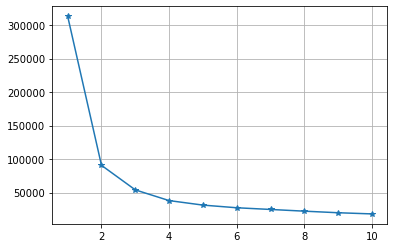

In [227]:
plt.plot(k,SSD,marker="*")
plt.grid()

In [ ]:
# in the elbpw plot at cluster 4 the value is sudden decline

In [230]:
for r in range(0,len(SSD)-1):
    value=(SSD[r]-SSD[r+1])*100/SSD[r]
    print(value)

71.07104940746225
40.46421615784385
29.639972029778104
17.741947129728025
12.689879279666677
9.318889156087607
10.349411345994609
10.607217623497233
8.814394530632317


In [231]:
McD_kmeans=KMeans(n_clusters=4)

In [232]:
McD_kmeans.fit(McD)

KMeans(n_clusters=4)

In [233]:
cluster_names=list(McD_kmeans.labels_)
cluster_names

[3,
 1,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 1,
 3,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 3,
 3,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 0,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 0,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 3,
 0,
 2,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 0,
 1,
 3,
 2,
 3,
 2,
 0,
 1,
 0,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 0,
 0,
 3,
 0,
 2,
 2,
 1,
 3,
 0,
 0,
 3,
 0,
 0,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 0,
 3,
 2,
 1,
 1,
 0,
 3,
 1,
 3,
 0,
 1,
 3,
 1,
 3,
 0,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 3,


In [234]:
McD_kmeans.score(McD)

-37988.59355236408

In [235]:
centroids = pd.DataFrame(McD_kmeans.cluster_centers_)

In [236]:
centroids.columns =  McD.columns

In [237]:
df= pd.concat([McD ,pd.Series(McD_kmeans.labels_) ] , axis =1 )
df.rename(columns= {df.columns[15] :'Cluster_name'}, inplace =  True)

In [238]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster_name
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,3
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,1,2


In [239]:
df.Cluster_name.unique()

array([3, 1, 0, 2])

<AxesSubplot:xlabel='Cluster_name', ylabel='count'>

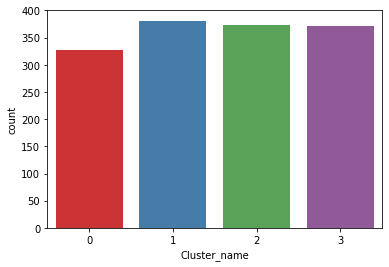

In [246]:
sns.countplot(x ='Cluster_name', data = df, palette = "Set1")